# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv("orange_small_churn_data.train")
y = np.fromfile("orange_small_churn_labels.train", dtype=int, sep='\n')
X.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


2\. Рассчитайте доли классов `отток` и `не отток`.

In [3]:
y[:10]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [4]:
size1 = float(y[y == 1].size)
size_1 = float(y[y == -1].size)

churn = size1 / y.size
nochurn = size_1 / y.size
(churn, nochurn)

(0.0744, 0.9256)

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

На данных с nan значениями неудобно мерять корреляцую, проведем предобработку: заменим nan на 0, предворительно убедившись, что 0 не присутствует среди категориальных признаков.

In [5]:
0 in X.iloc[:, 190:230].values

False

In [6]:
corrs = []
X.fillna(0, inplace=True)

for i in range(190):
    col = X.iloc[:, i]
    corr = abs(col[y == 1].mean() / size1 - col[y == -1].mean() / size_1)
    corrs.append(corr)
    
len(corrs)

190

Теперь нужно посчитать корреляции для категориальных признаков. Колонки var209 и var230 содержат только нулевые значения, для них корреляцию запишем 0, еще несколько колонок содержат только один отличный от нуля признак. Колонки только с одним признаком можно рассматривать как бинарные (0 и сам признак).

In [7]:
import scipy.stats as ss

In [8]:
def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

Не будем учитывать те колонки, в которых только одна категория.

In [9]:
def get_conf_matrix(feature, target):
    confusions = []
    categories = feature.unique()
    if len(categories) < 2:
        return None
    for i in categories:
        for j in [-1, 1]:
            one = (feature == i).values
            two = target == j
            cond = one & two
            confusions.append(cond.sum())
            
    return np.array(confusions).reshape(len(categories), 2)

In [10]:
cat_corr = []
for i in range(190, 230):
    col = X.iloc[:, i]
    conf_mat = get_conf_matrix(col, y)
    if conf_mat != None:
        cr_stat = cramers_stat(conf_mat)
    else:
        cr_stat = 0
        
    cat_corr.append(cr_stat)

print cat_corr

C:\Users\yuranich\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


[0.013905030394943372, 0.15124744994612724, 0.070206596248984121, 0.019348144748503909, 0.031671311725115503, 0.012235099338811926, 0.082120161041182901, 0.29259328641845067, 0.40783117717402112, 0.52599126441625521, 0.01813396848789418, 0.36343287292663434, 0.014220516793574597, 0.069023300553773259, 0.072557849012233999, 0.085054492582019067, 0.058275604638053723, 0.011881754357823114, 0, 0.048540020354891751, 0.031932101175585148, 0.087020127729270841, 0.015963978510545051, 0.52599126441625521, 0.0051654271616192121, 0.22894003457385523, 0.52986260512218375, 0.10175630348119198, 0.025773298835697029, 0.29259328641845067, 0.049118823134367072, 0.29259328641845067, 0.011713793721748038, 0.0087762315344063757, 0.056514869230157805, 0.04851566473733445, 0.055619445475057629, 0.07557545823201052, 0.062484746928285713, 0]


In [11]:
len(cat_corr)

40

Посмотрим на значения.

In [12]:
num_corr_tup = zip(corrs, X.columns[:190])
cat_corr_tup = zip(cat_corr, X.columns[190:230])

In [13]:
sorted(num_corr_tup, reverse=True)[:10]

[(1842.7429835675757, 'Var153'),
 (771.1621331767179, 'Var38'),
 (667.9894609374365, 'Var133'),
 (449.4321387270334, 'Var76'),
 (144.32240763457875, 'Var163'),
 (131.70024522778843, 'Var134'),
 (87.80778818785447, 'Var149'),
 (53.438014217588226, 'Var131'),
 (33.86394794849452, 'Var81'),
 (22.42616635269252, 'Var69')]

In [14]:
sorted(cat_corr_tup, reverse=True)[:10]

[(0.52986260512218375, 'Var217'),
 (0.52599126441625521, 'Var214'),
 (0.52599126441625521, 'Var200'),
 (0.40783117717402112, 'Var199'),
 (0.36343287292663434, 'Var202'),
 (0.29259328641845067, 'Var222'),
 (0.29259328641845067, 'Var220'),
 (0.29259328641845067, 'Var198'),
 (0.22894003457385523, 'Var216'),
 (0.15124744994612724, 'Var192')]

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
top_names = [x[1] for x in sorted(num_corr_tup, reverse=True)[:20]]

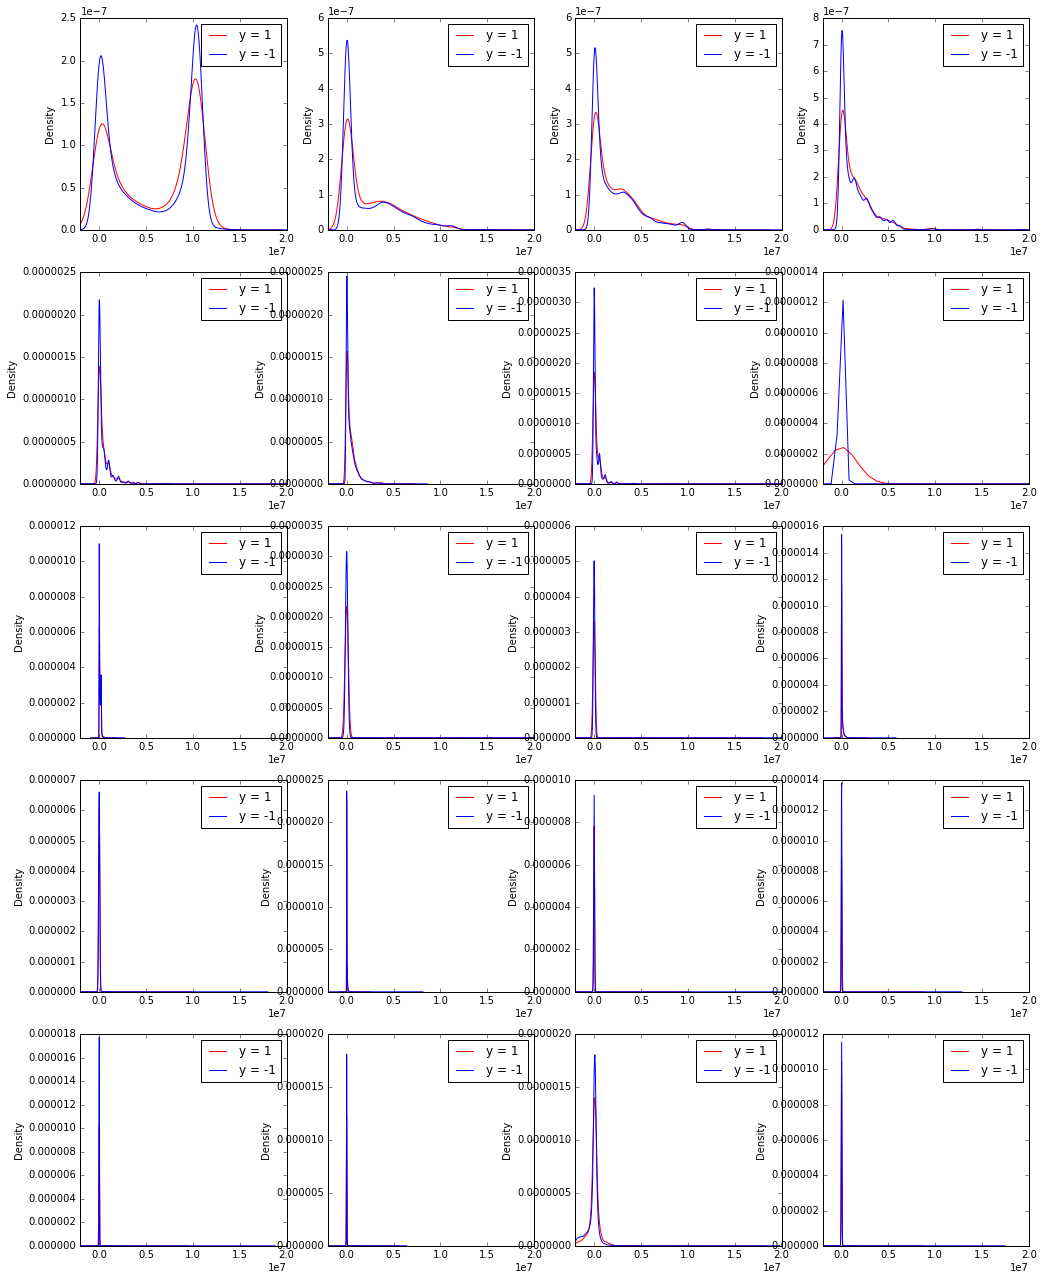

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(17, 22))
for var, i in zip (top_names, range(20)):
    col1 = X[var][y == 1]
    col_1 = X[var][y == -1]
    col1.plot(ax=axes[i/4, i%4], color='r', subplots=True, label="y = 1", kind='kde', legend=True, xlim=(-2*10**6, 2*10**7))
    col_1.plot(ax=axes[i/4, i%4], color='b', subplots=True, label="y = -1", kind='kde', legend=True, xlim=(-2*10**6, 2*10**7))

Исходя из данных графиков, можно предположить, что чем больше дисперсия, тем больше корреляция. Посмотрим на значения дисперсии:

([<matplotlib.axis.XTick at 0xdef2320>,
 <a list of 20 Text xticklabel objects>)

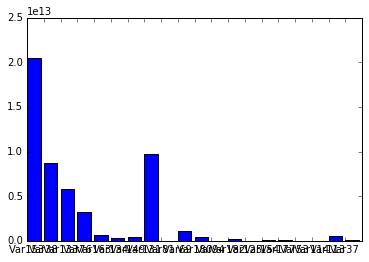

In [18]:
var_nums = X[top_names].var(axis=0)
plt.bar(range(len(var_nums)), var_nums.values)
plt.xticks(range(len(var_nums)), var_nums.index.values)

В целом уменьшение дисперсии просматривается, но есть шум и выбросы

Построим объекты в координатах пар признаков

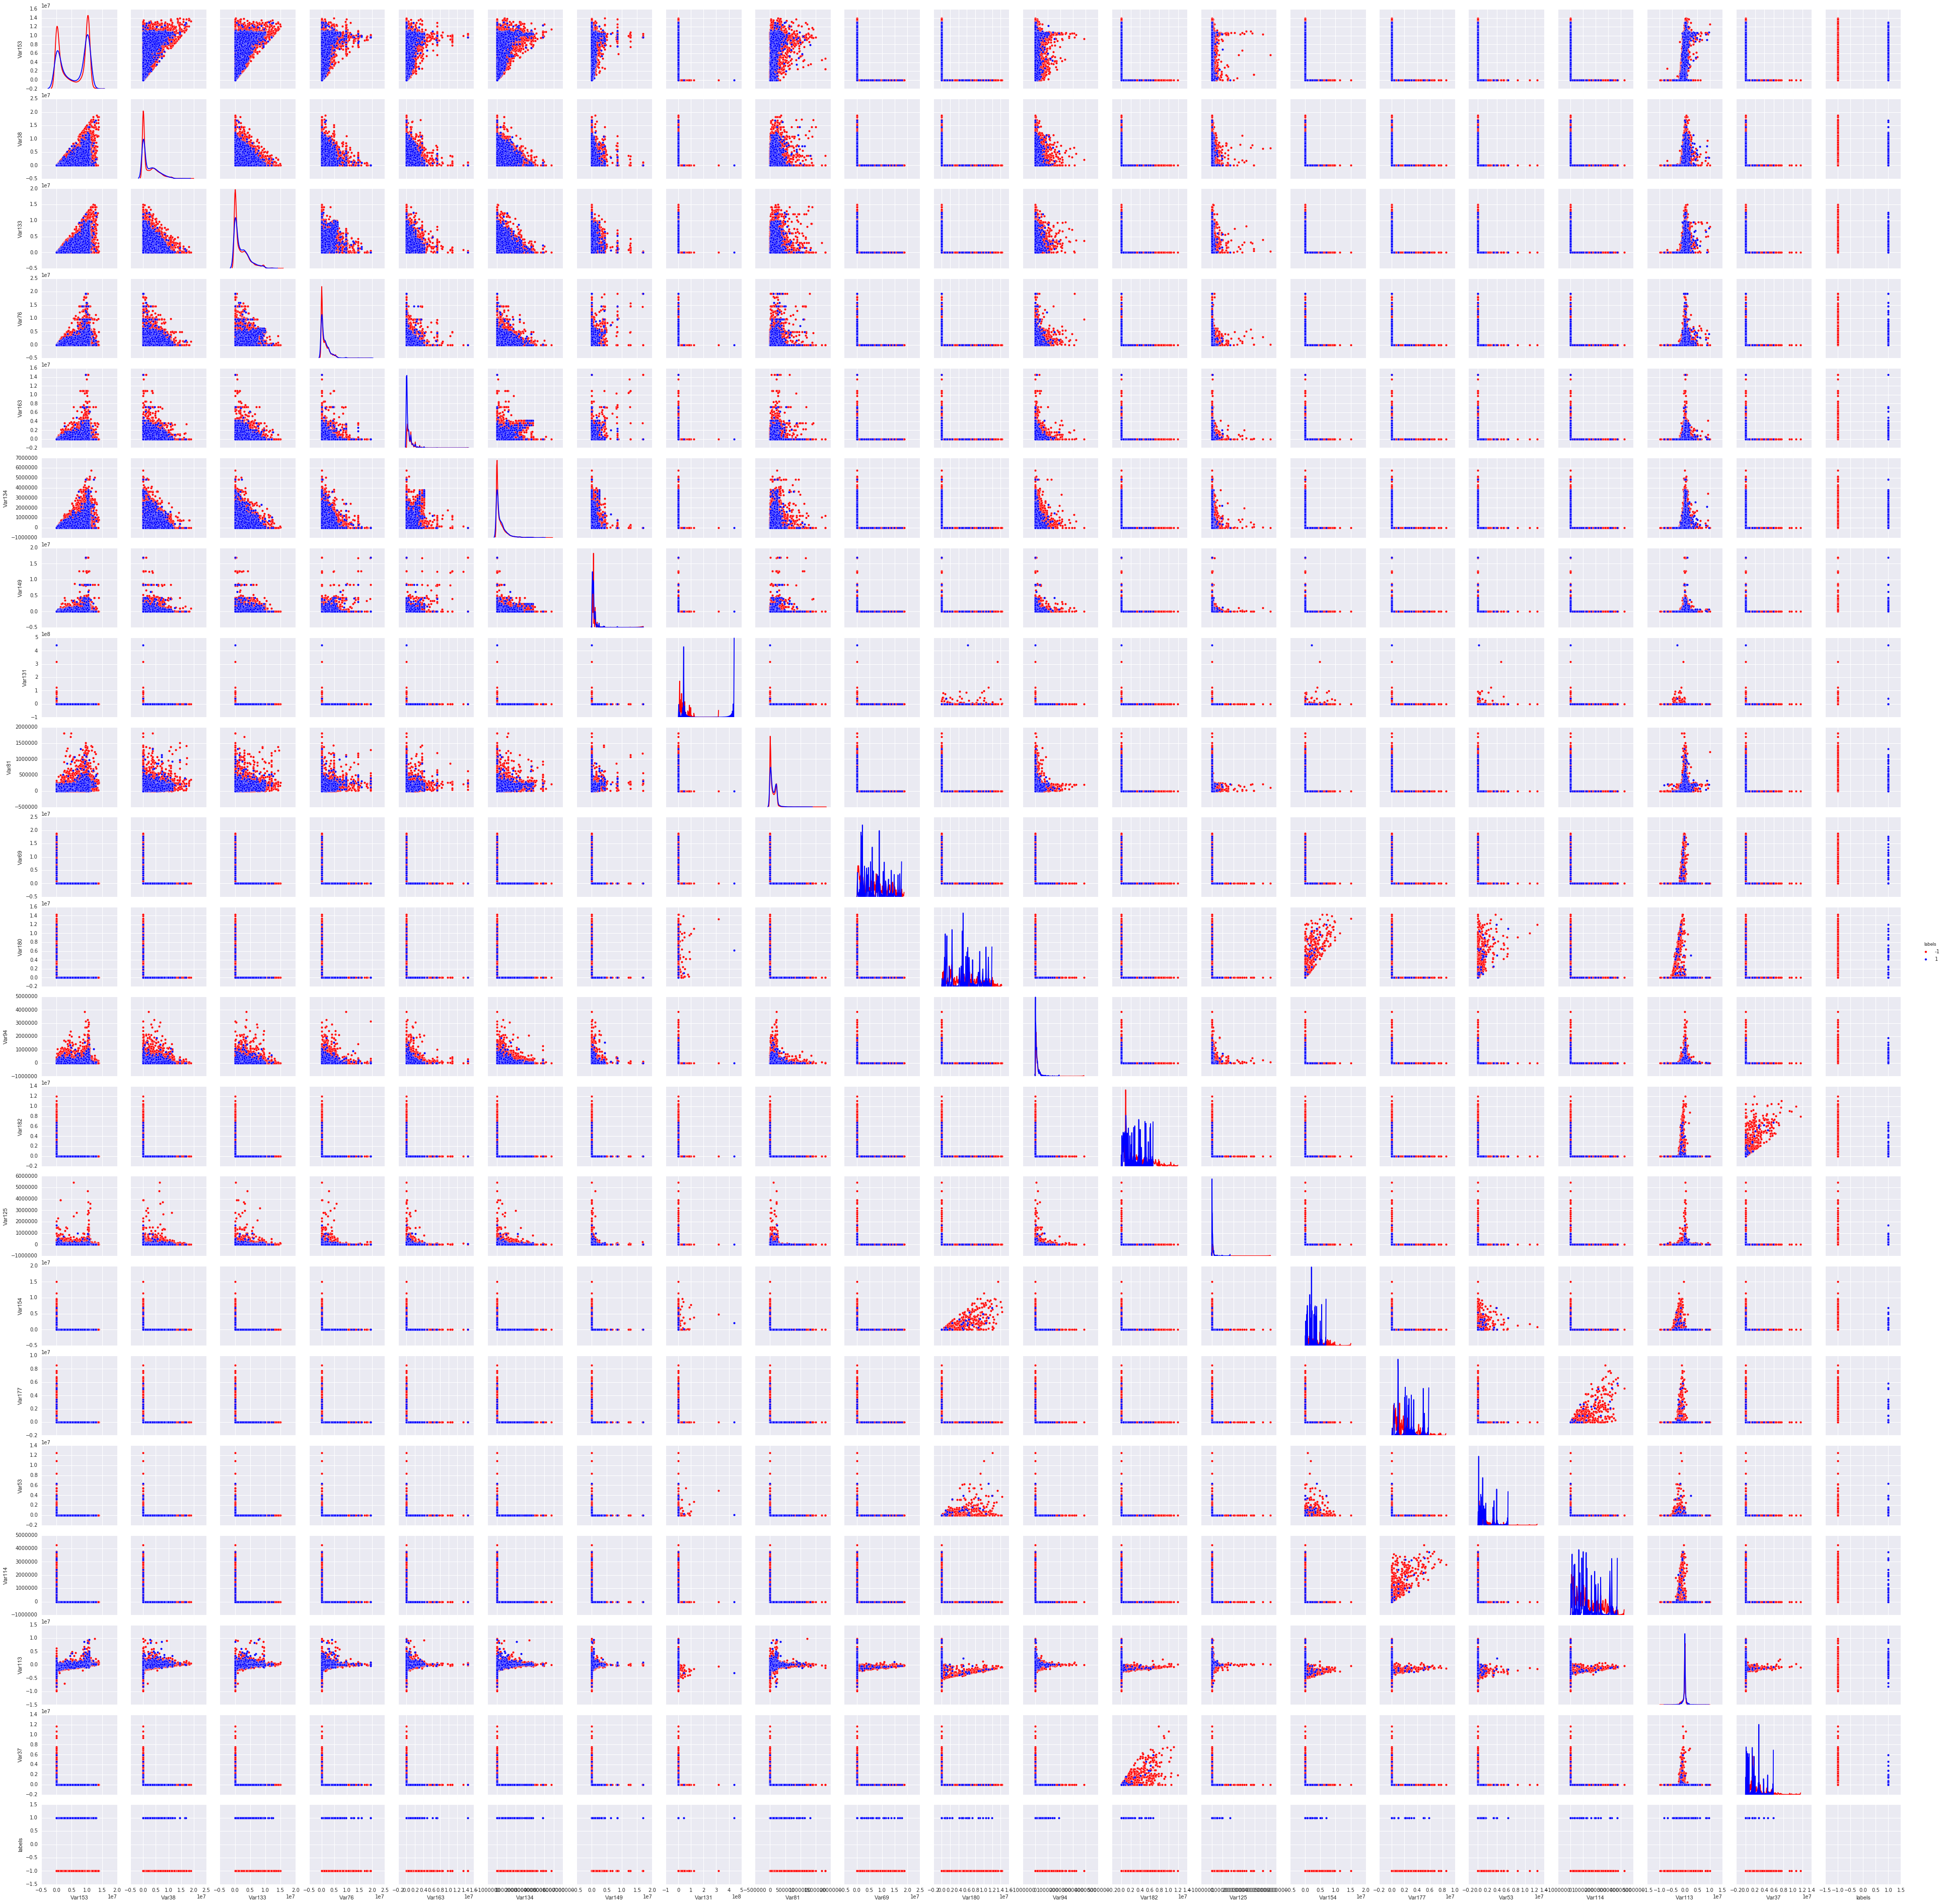

In [40]:
data = X[top_names].copy()
data.insert(20, 'labels', y)
sns.pairplot(data, palette=["red","blue"], hue="labels", diag_kind='kde')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [19]:
import random

In [20]:
random.seed(a = 10)

Для удобства, будет строить для 12 признаков

singular matrix for col:  30
singular matrix for col:  47


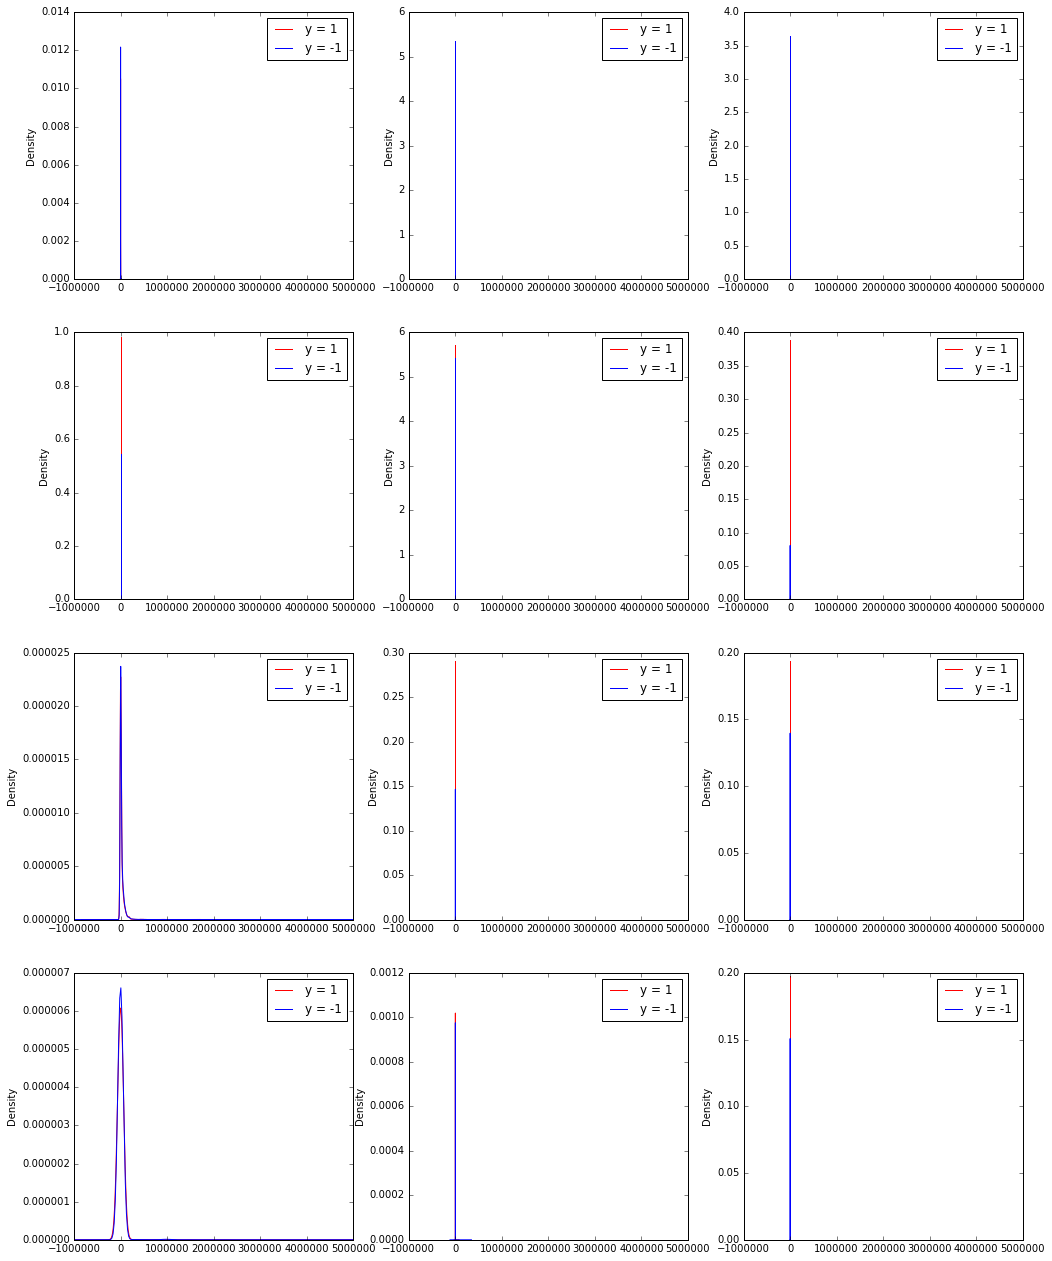

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(17, 22))
i = 0
random_nums = []
while i < 12:
    r_num = random.randint(0, 189)
    col = X.iloc[:, r_num]
    col1 = col[y == 1]
    col_1 = col[y == -1]
    try:
        col1.plot(ax=axes[i/3, i%3], color='r', subplots=True, label="y = 1", kind='kde', legend=True, xlim=(-1*10**6, 5*10**6))
        col_1.plot(ax=axes[i/3, i%3], color='b', subplots=True, label="y = -1", kind='kde', legend=True, xlim=(-1*10**6, 5*10**6))
        i = i + 1
        random_nums.append(r_num)
    except np.linalg.linalg.LinAlgError:
        print "singular matrix for col: ", r_num
        #no op


Для отображенных признаков можно также посмотреть дисперсии

([<matplotlib.axis.XTick at 0xddf9a20>,
 <a list of 12 Text xticklabel objects>)

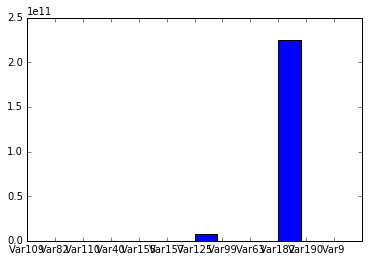

In [22]:
var_rand_nums = X.iloc[:, random_nums].var(axis=0)
plt.bar(range(len(var_rand_nums)), var_rand_nums.values)
plt.xticks(range(len(var_rand_nums)), var_rand_nums.index.values)

In [23]:
var_rand_nums

Var109    1.776304e+04
Var82     3.464374e-01
Var110    7.414600e-01
Var40     2.987129e+01
Var155    3.231078e-01
Var157    8.839701e+02
Var125    7.766769e+09
Var99     2.936863e+02
Var63     3.375213e+02
Var182    2.246261e+11
Var190    9.687745e+06
Var9      3.396502e+02
dtype: float64

Видим, что для случайно выбранных значений наблюдается очень сильный разброс дисперсии и нет явной закономерности

Отображение объектов в парах признаков.

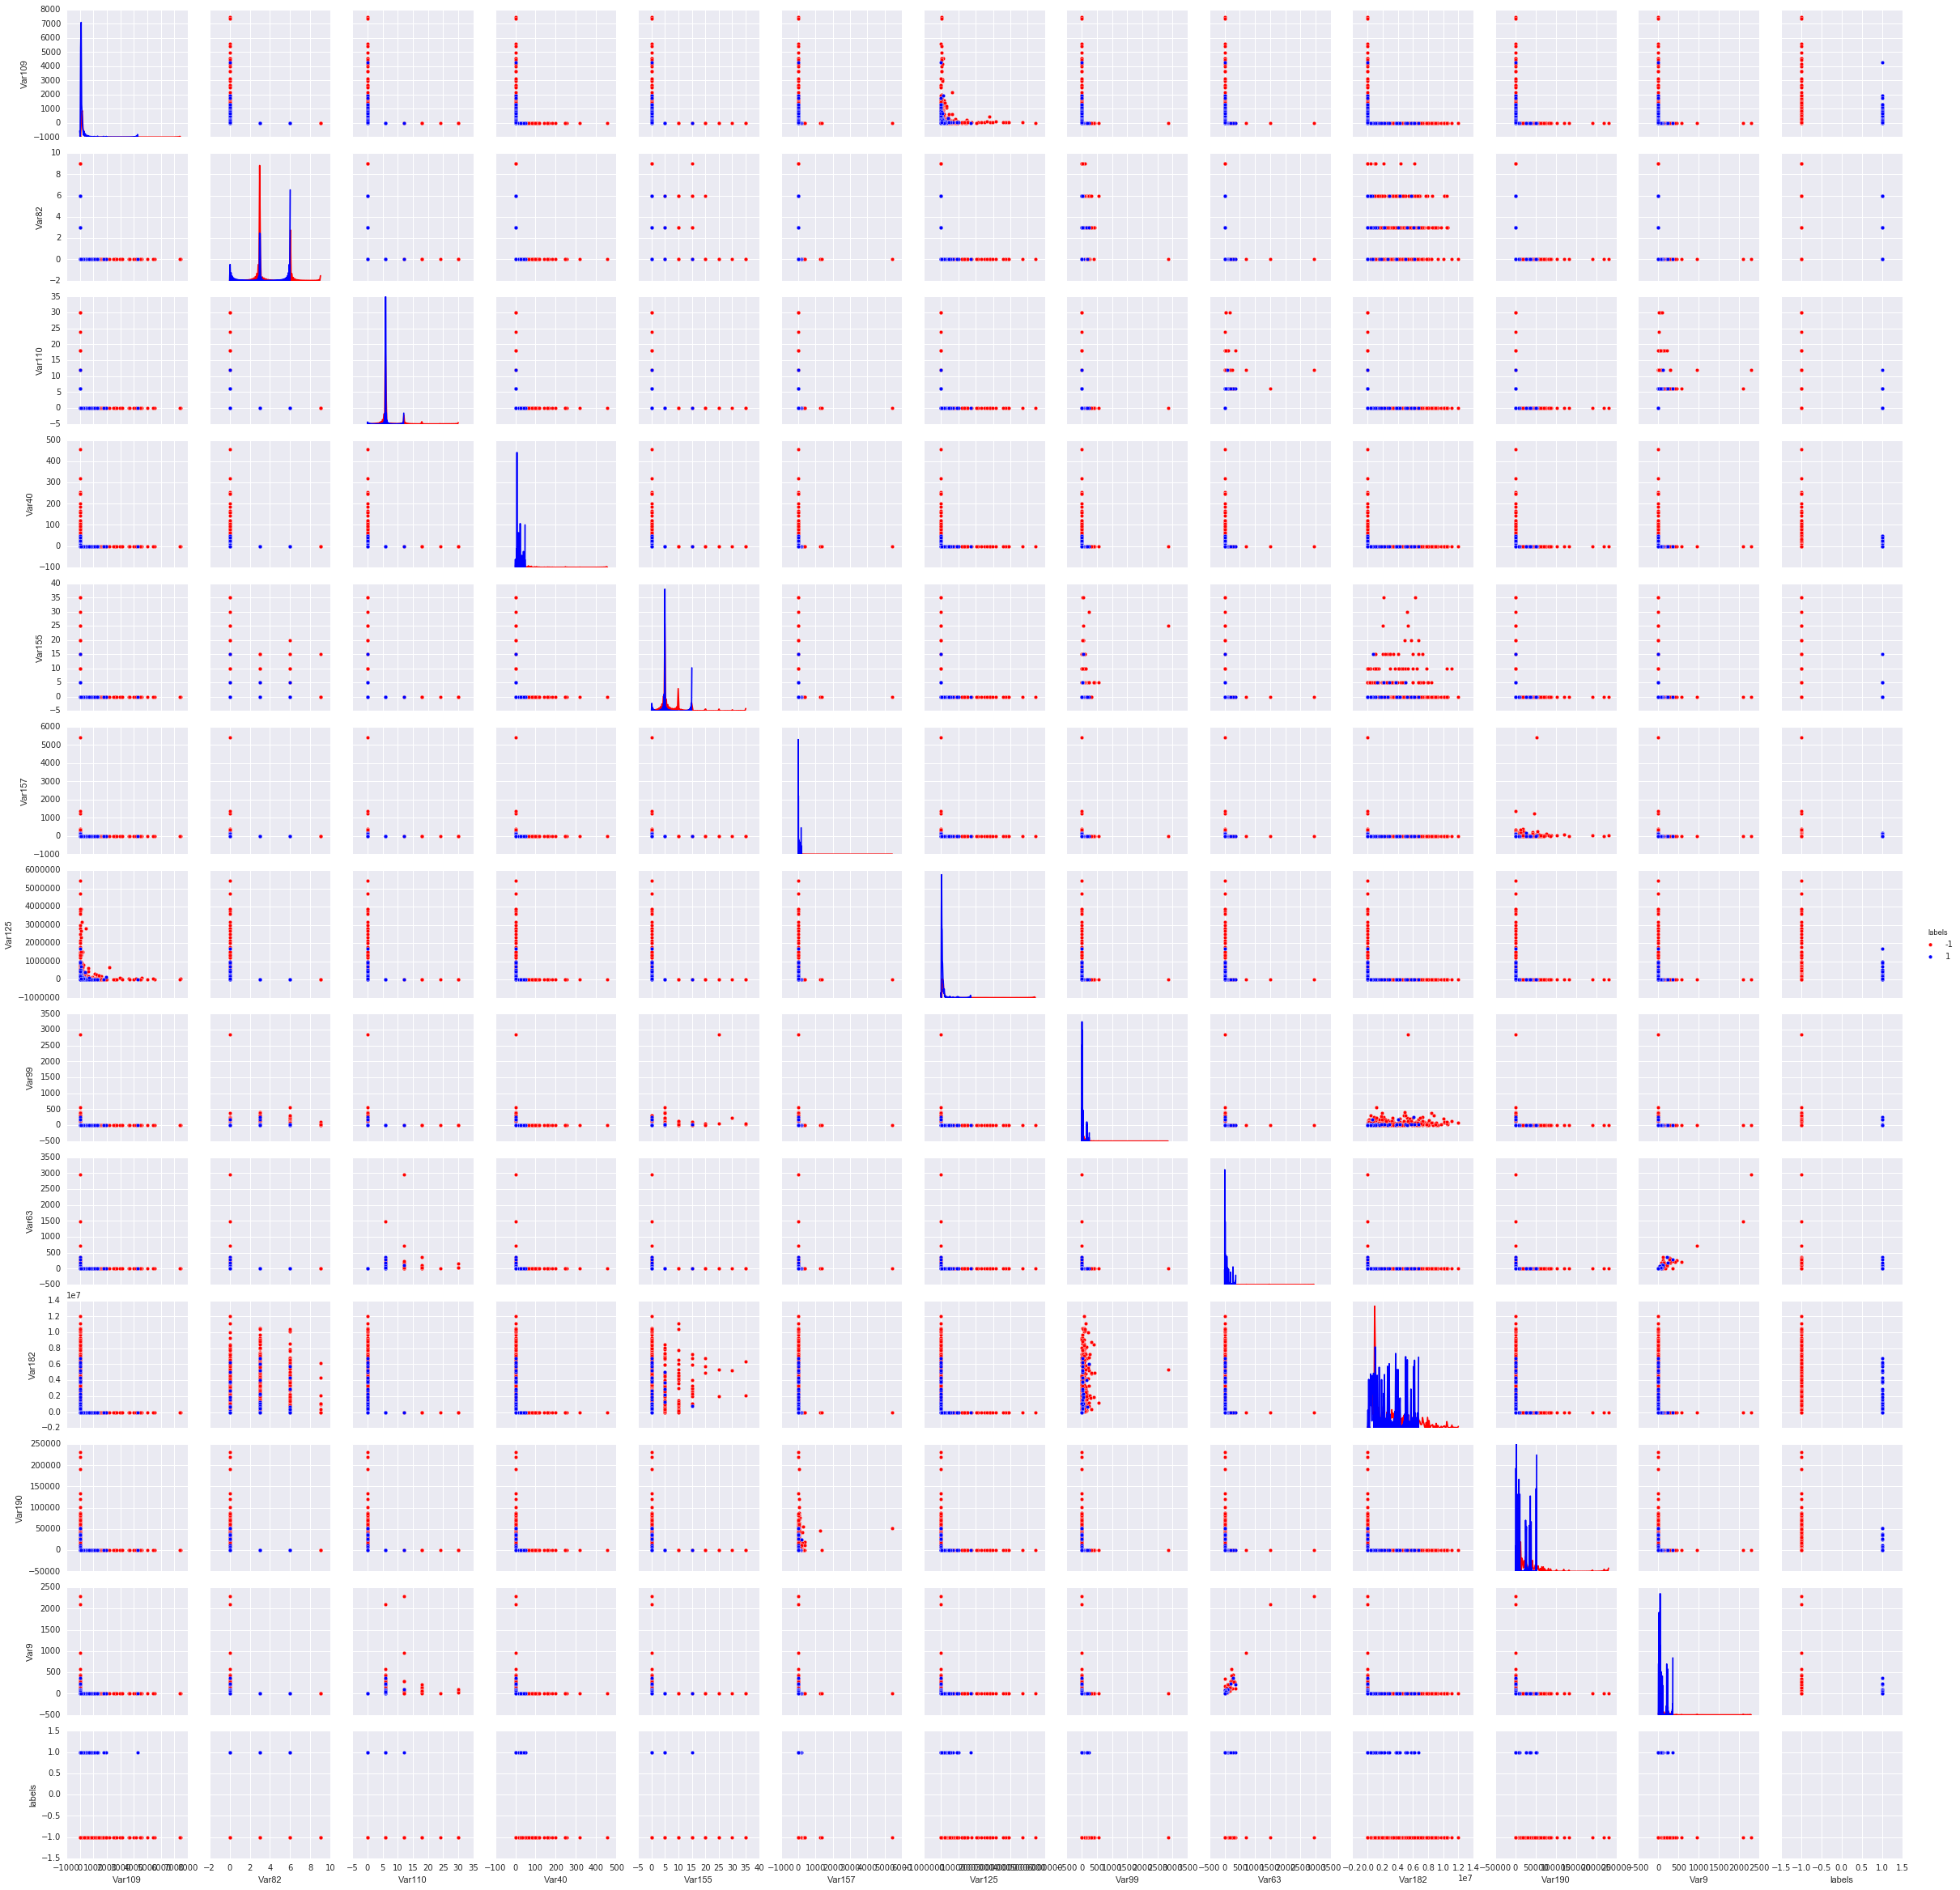

In [41]:
data_rand = X.iloc[:, random_nums].copy()
data_rand.insert(12, 'labels', y)
sns.pairplot(data_rand, palette=["red","blue"], hue="labels", diag_kind='kde')

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [24]:
sorted(num_corr_tup)[:10]

[(0.0, 'Var141'),
 (0.0, 'Var15'),
 (0.0, 'Var167'),
 (0.0, 'Var169'),
 (0.0, 'Var175'),
 (0.0, 'Var185'),
 (0.0, 'Var20'),
 (0.0, 'Var31'),
 (0.0, 'Var32'),
 (0.0, 'Var39')]

singular matrix for name:  Var141
singular matrix for name:  Var15
singular matrix for name:  Var167
singular matrix for name:  Var169
singular matrix for name:  Var175
singular matrix for name:  Var185
singular matrix for name:  Var20
singular matrix for name:  Var31
singular matrix for name:  Var32
singular matrix for name:  Var39
singular matrix for name:  Var42
singular matrix for name:  Var48
singular matrix for name:  Var52
singular matrix for name:  Var55
singular matrix for name:  Var79
singular matrix for name:  Var8
singular matrix for name:  Var138
singular matrix for name:  Var2
singular matrix for name:  Var29
singular matrix for name:  Var90
singular matrix for name:  Var67
singular matrix for name:  Var27
singular matrix for name:  Var122
singular matrix for name:  Var49


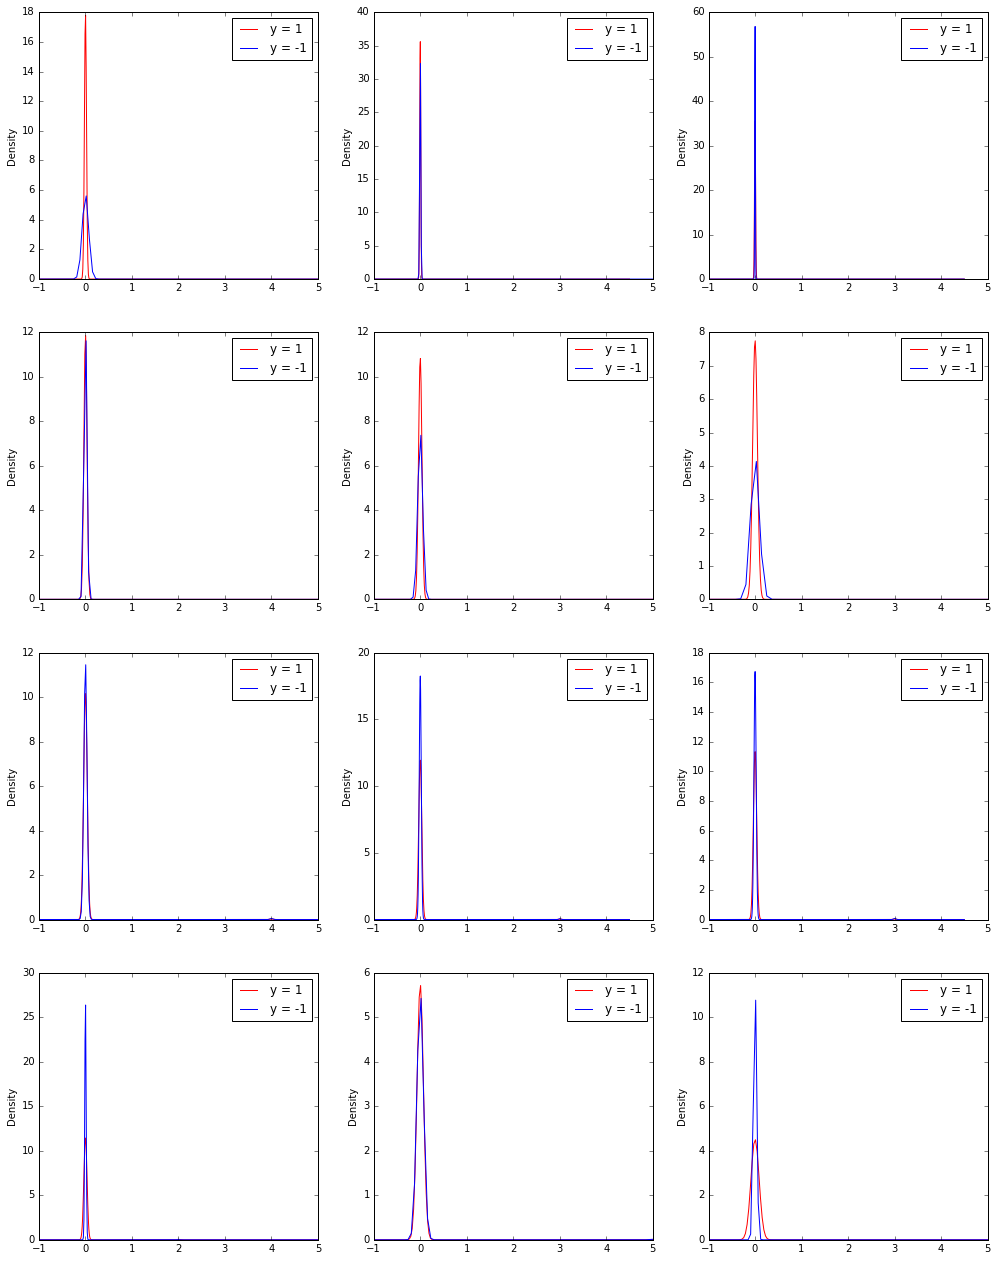

In [25]:
last_names = [x[1] for x in sorted(num_corr_tup)]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(17, 22))
i = 0
plotted_names = []
while i < 12:
    name = last_names.pop(0)
    col = X[name]
    col1 = col[y == 1]
    col_1 = col[y == -1]
    try:
        col1.plot(ax=axes[i/3, i%3], color='r', subplots=True, label="y = 1", kind='kde', legend=True, xlim=(-1, 5))
        col_1.plot(ax=axes[i/3, i%3], color='b', subplots=True, label="y = -1", kind='kde', legend=True, xlim=(-1, 5))
        i = i + 1
        plotted_names.append(name)
    except np.linalg.linalg.LinAlgError:
        print "singular matrix for name: ", name


In [26]:
var_last = X[plotted_names].var(axis=0)
var_last

Var14     0.296003
Var26     0.008321
Var116    0.003149
Var4      0.062754
Var100    0.171318
Var34     0.530337
Var142    0.075316
Var118    0.031391
Var130    0.037196
Var173    0.015763
Var155    0.323108
Var19     0.087015
dtype: float64

([<matplotlib.axis.XTick at 0x8f37668>,
 <a list of 12 Text xticklabel objects>)

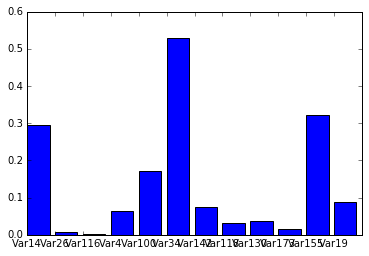

In [27]:
plt.bar(range(len(var_last)), var_last.values)
plt.xticks(range(len(var_last)), var_last.index.values)

Все значения не больше 0.6. По сравнению с дисперсией наиболее коррелирующих компонент, это просто шум.

Отобразим объекты в координатах пар признаков

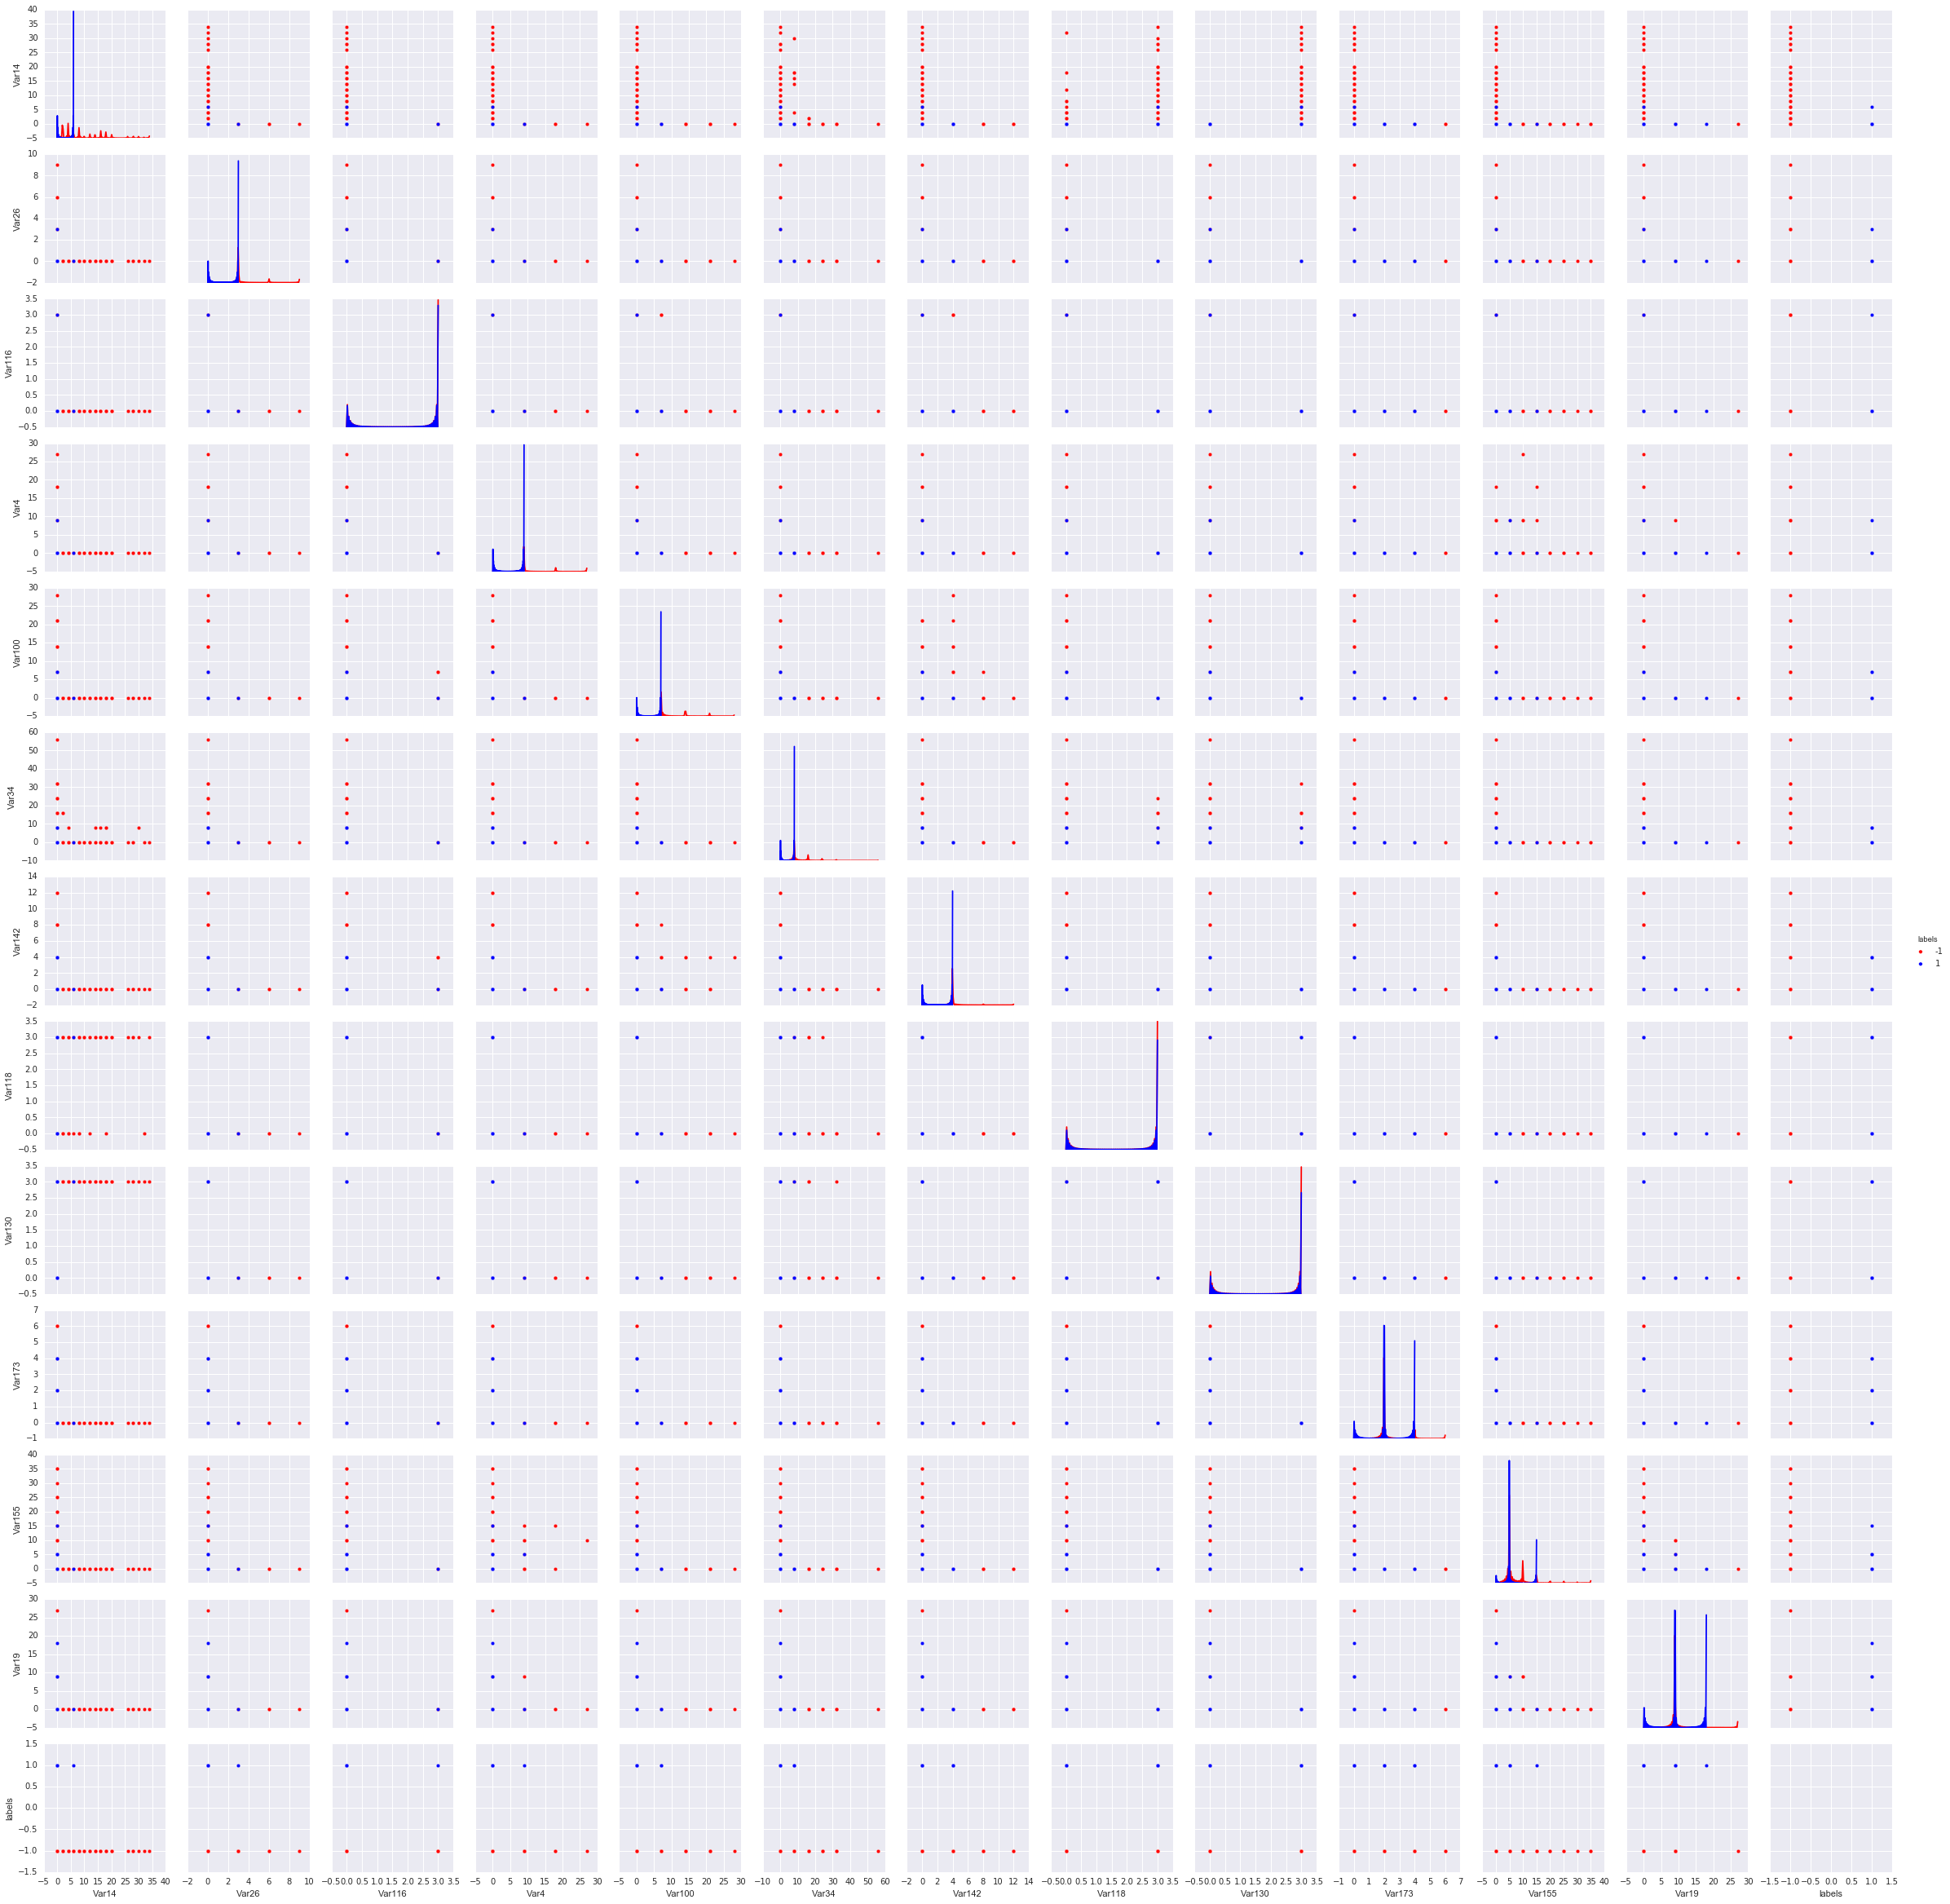

In [42]:
data_last = X[plotted_names].copy()
data_last.insert(12, 'labels', y)
sns.pairplot(data_last, palette=["red","blue"], hue="labels", diag_kind='kde')

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [28]:
top_cats = [x[1] for x in sorted(cat_corr_tup, reverse=True) if len(X[x[1]].unique()) < 10]
top_cats

['Var218',
 'Var205',
 'Var229',
 'Var225',
 'Var227',
 'Var221',
 'Var210',
 'Var211',
 'Var194',
 'Var201',
 'Var213',
 'Var203',
 'Var191',
 'Var196',
 'Var208',
 'Var223',
 'Var224',
 'Var215',
 'Var230',
 'Var209']

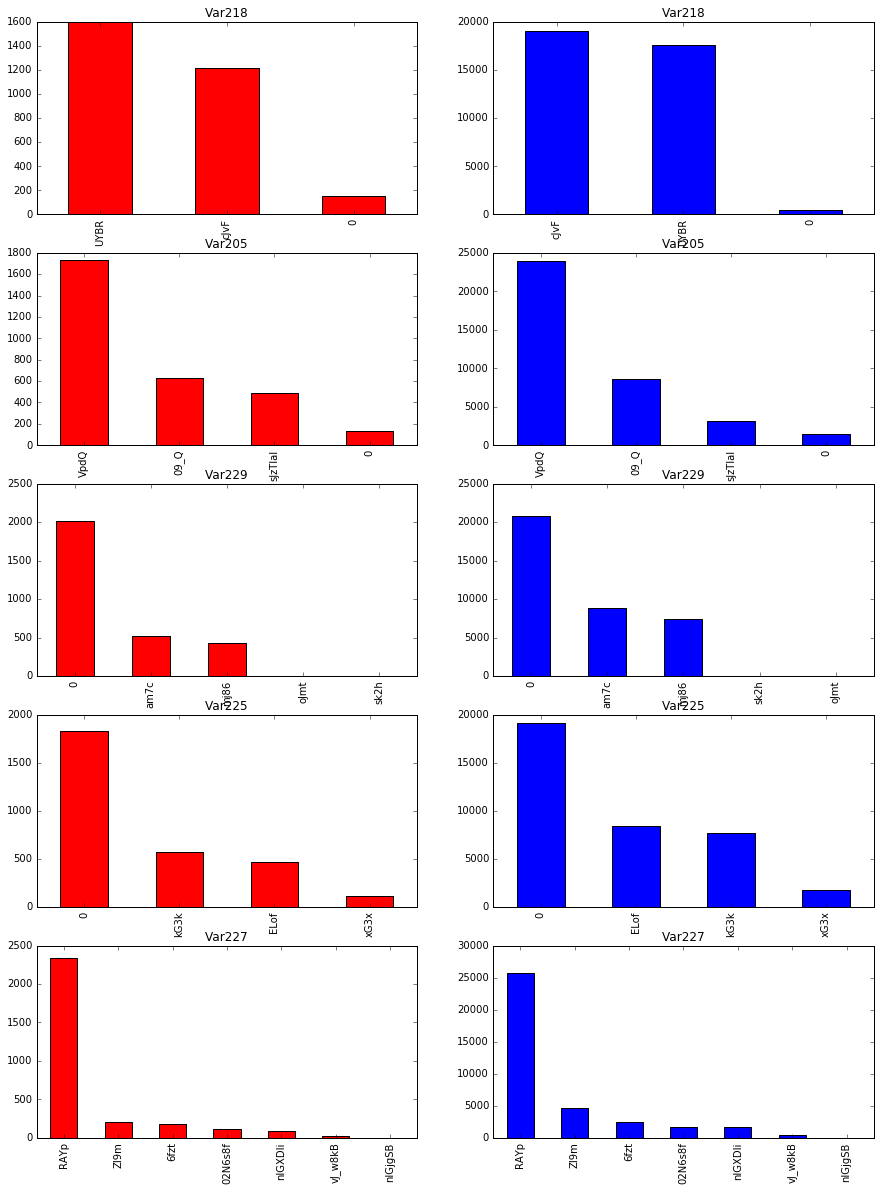

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for var, i in zip (top_cats[:5], range(5)):
    col1 = X[var][y == 1]
    col_1 = X[var][y == -1]
    col1.value_counts().plot(kind='bar', color='r', subplots=True, ax=axes[i, 0])
    col_1.value_counts().plot(kind='bar', color='b', subplots=True, ax=axes[i, 1])

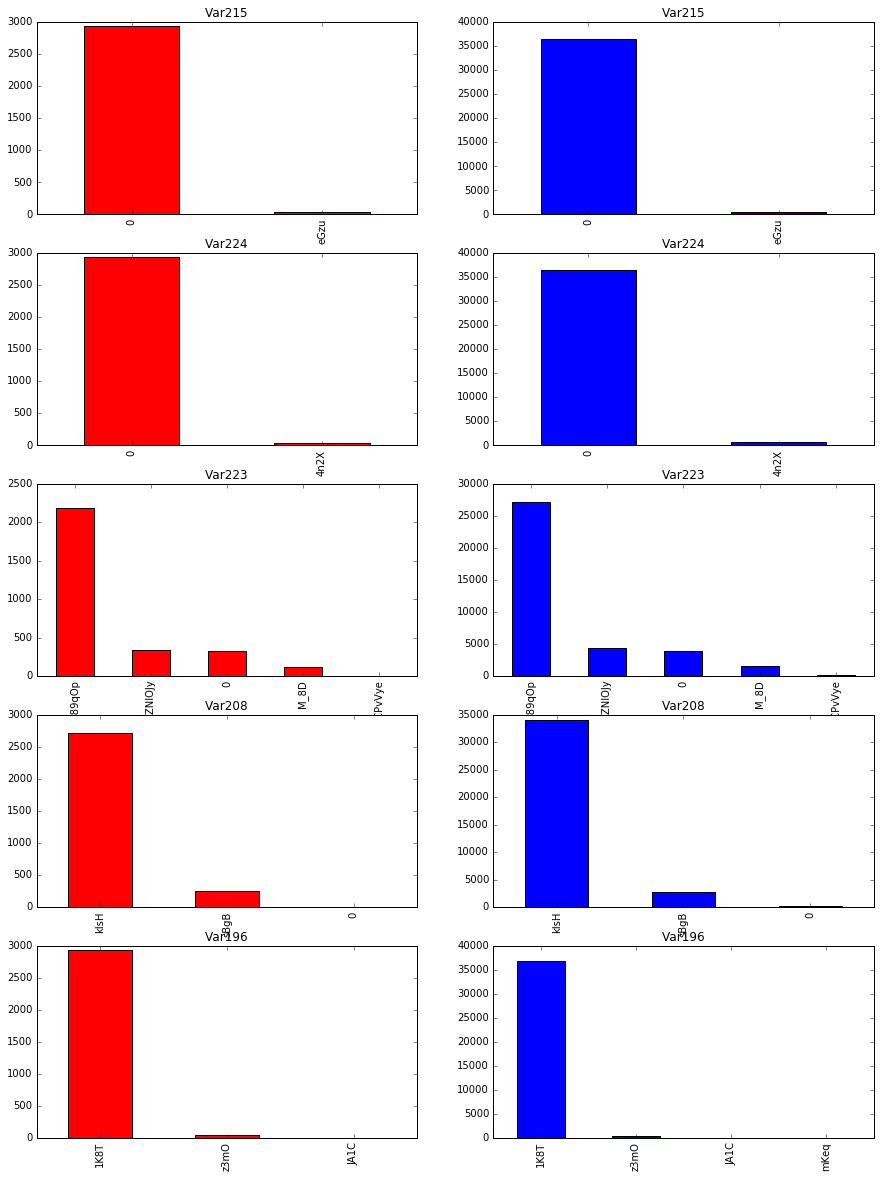

In [30]:
last_cats = [x[1] for x in sorted(cat_corr_tup) if len(X[x[1]].unique()) < 10 and len(X[x[1]].unique()) > 1]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for var, i in zip (last_cats[:5], range(5)):
    col1 = X[var][y == 1]
    col_1 = X[var][y == -1]
    col1.value_counts().plot(kind='bar', color='r', subplots=True, ax=axes[i, 0])
    col_1.value_counts().plot(kind='bar', color='b', subplots=True, ax=axes[i, 1])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Выводы: как можно заметить по долям, ушедших пользователей гораздо меньше, чем оставшихся, то есть изначально выборка несбалансирована. Возможно, оценка корреляции числовых признаков с целевой переменной как разница мат. ожиданий не очень точна, но некоторые закономерности прослеживаются.
1) Наиболее коррелирующие признаки имеет очень большой разброс значений (большую дисперсию), причем чем больше, тем лучше.
Наимение коррелирующие, напротив, имеют близкую к нулю дисперсию (это связано в основном с тем, что такие признаки имеют очень много незаполненных значений, которые перед началом анализа были заполнены нулями).
2) У сильно коррелирующих признаков значения, относящиеся к 1 (churn) значительно ниже относящихся к -1 (no churn), чем собственно и обусловливается большая разница между мат ожиданиями.
Для категориальных признаков ситуация похожа. Наибольший вклад вносят те признаки, в которых есть как минимум 2 ярко выраженных категории, причем некоторые из них чаще встречаются только для одного класса, что обуславливает корреляцию.

Предположительно наибольший вклад:
Var153, Var38, Var133, Var76, Var217, Var214, Var200

Шумовые:
В первую очередь те, что в принципе не несут никакой информации (все поля пустые), а также те, которые имеют не более одного различного значения.
 Var141
 Var15
 Var167
 Var169
Var175
Var185
 Var20
Var31
 Var32
 Var39
 Var42
Var48
 Var52
 Var55
Var79
Var8
 Var138
Var2
Var29
Var90
Var67
Var27
 Var122
 Var49
среди категориальных
var209, var230, var215, var224

Отбор призников будет полезен для дальнейшего анализа.